(10%,1)->(20%,1)->(30%,1)

In [44]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [47]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [48]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.1,0.0
1,5.0,3.6,0.0
2,4.6,3.4,0.0
3,4.4,2.9,0.0
4,4.3,3.0,0.0
...,...,...,...
350,7.7,3.0,1.0
351,6.3,3.4,1.0
352,6.4,3.1,1.0
353,6.8,3.2,1.0


In [49]:
def plot_hyperplane(clf, X, y,h=0.02,draw_sv=True,title='hyperplane'):
    # create a mesh to plot in
    plt.figure(figsize=(10,6))
    X = np.mat(X)
    # print("X",X)
    # print("y",y)
 
    # 使用numpy的库函数找到最值,确定绘图范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
 
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    # print("Z", np.c_[xx.ravel(), yy.ravel()])
    
    # x,y扁平化,生成二维坐标并将预测值作为函数值
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # SVM的分割超平面
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # 绘制康拓图
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)
 
    markers = ['o', '*', '^']
    colors = ['r', 'b', 'c']
    # 去重
    labels = np.unique(y)
    # print("LABELS",y)
 
    # 对于每一个标签种类
    for label in labels:
        # 这是掩码索引
        label = int(label)
        plt.scatter(X[y == label][:, 0].tolist(),
                    X[y == label][:, 1].tolist(),
                    c=colors[label],
                    marker=markers[label])
    # 画出支持向量
    if draw_sv:
        sv = clf.support_vectors_
        print(sv)
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


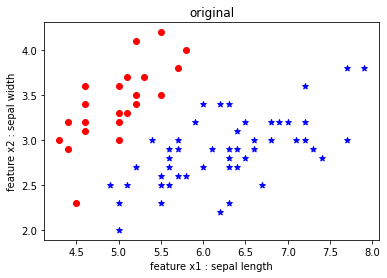

BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 no error : 0.9436619718309859
BESVM Accuracy (on testing) = with bounded error 0.1 : 0.9859154929577465


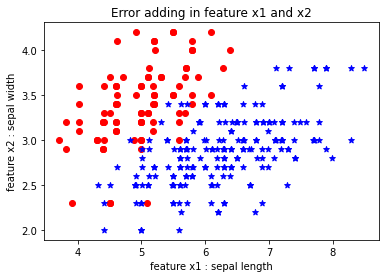

In [50]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 no error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [51]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 no err : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 no err : 1.0


(20%,0)

In [52]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.1,0.0
1,5.0,3.6,0.0
2,4.6,3.4,0.0
3,4.4,2.9,0.0
4,4.3,3.0,0.0
...,...,...,...
350,7.7,3.0,1.0
351,6.3,3.4,1.0
352,6.4,3.1,1.0
353,6.8,3.2,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


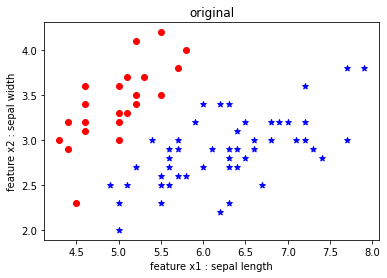

BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 no error : 0.9084507042253521
BESVM Accuracy (on testing) = with bounded error 0.1 : 0.9295774647887324


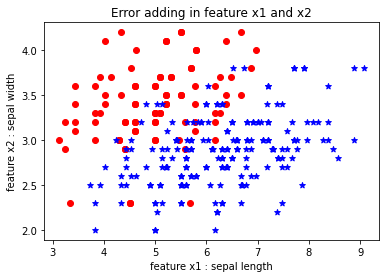

In [53]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 no error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [54]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.2,x2 no err : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.2,x2 no err : 0.9


(30%,0)

In [55]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.1,0.0
1,5.0,3.6,0.0
2,4.6,3.4,0.0
3,4.4,2.9,0.0
4,4.3,3.0,0.0
...,...,...,...
350,7.7,3.0,1.0
351,6.3,3.4,1.0
352,6.4,3.1,1.0
353,6.8,3.2,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


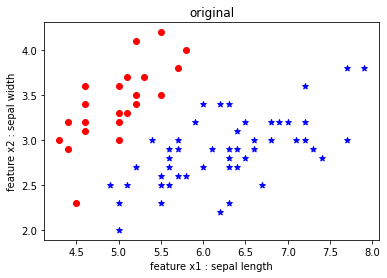

BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 no error : 0.8802816901408451
BESVM Accuracy (on testing) = with bounded error 0.1 : 0.8309859154929577


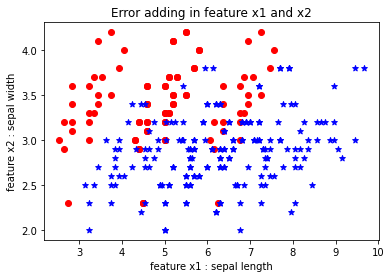

In [56]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 no error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [57]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 no err : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 no err : 0.8333333333333334


(0,10%)

In [58]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e2 = temp['x2'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.695634,1.0
351,6.3,3.095634,1.0
352,6.4,2.795634,1.0
353,6.8,2.895634,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


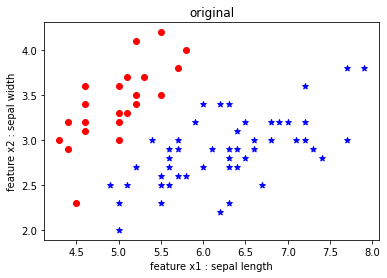

BESVM Accuracy (on training) = with x1  no bounded error,x2 0.1 error : 0.9788732394366197
BESVM Accuracy (on testing) = with x1  no bounded error,x2 0.1 error : 1.0


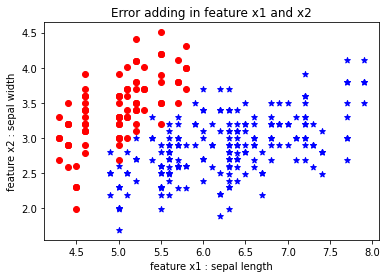

In [59]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1  no bounded error,x2 0.1 error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1  no bounded error,x2 0.1 error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [60]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.1 err : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.1 err : 1.0


(0,20%)

In [61]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e2 = temp['x2'].mean()*0.2

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.391268,1.0
351,6.3,2.791268,1.0
352,6.4,2.491268,1.0
353,6.8,2.591268,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


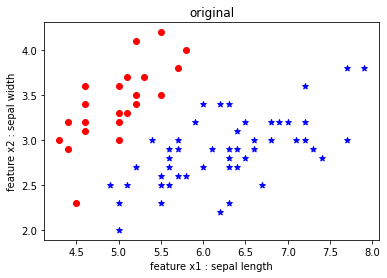

BESVM Accuracy (on training) = with x1 no bounded error,x2 0.2 error : 0.9577464788732394
BESVM Accuracy (on testing) = with x1 no bounded error,x2 0.2 error : 0.9436619718309859


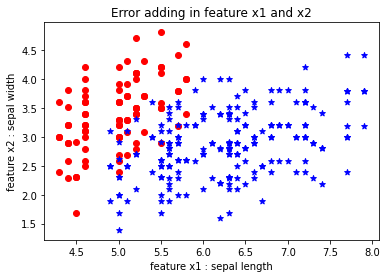

In [62]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 no bounded error,x2 0.2 error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 no bounded error,x2 0.2 error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [63]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.2 err : '+str(result_be_test))



Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.2 err : 1.0


(0,30%)

In [64]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e2 = temp['x2'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - 0
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.086901,1.0
351,6.3,2.486901,1.0
352,6.4,2.186901,1.0
353,6.8,2.286901,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


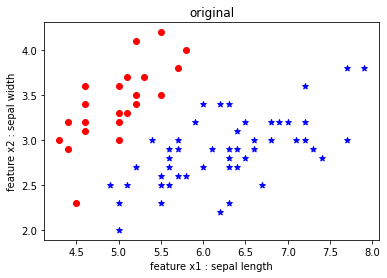

BESVM Accuracy (on training) = with x1 no bounded error,x2 0.3 error : 0.9225352112676056
BESVM Accuracy (on testing) = with x1 no bounded error,x2 0.3 error : 0.8732394366197183


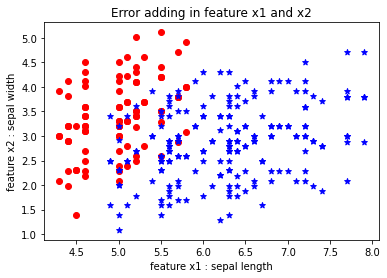

In [65]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 no bounded error,x2 0.3 error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 no bounded error,x2 0.3 error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


In [66]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.3 err : '+str(result_be_test))



Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 no bounded eror,x2 0.3 err : 0.9666666666666667


(10%,20%) -> 1.0

In [67]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.1
e2 = temp['x2'].mean()*0.2

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.391268,1.0
351,6.3,2.791268,1.0
352,6.4,2.491268,1.0
353,6.8,2.591268,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


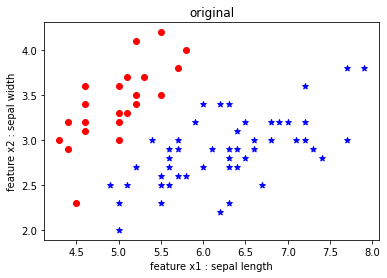

BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 0.2 error : 0.8908450704225352
BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.2 error : 0.8873239436619719


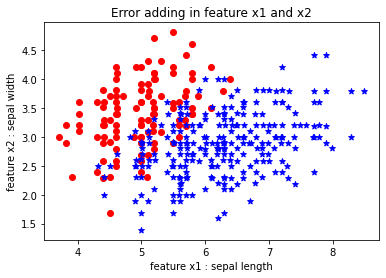

In [68]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 0.2 error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.2 error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [69]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 0.2 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 0.2 error : 1.0


(10%,30%) -> 0.9666666666666667

In [70]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.1
e2 = temp['x2'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.086901,1.0
351,6.3,2.486901,1.0
352,6.4,2.186901,1.0
353,6.8,2.286901,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


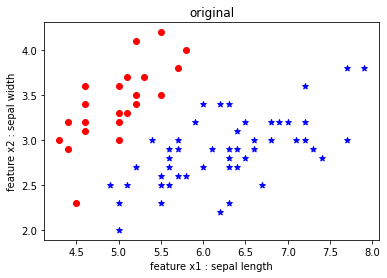

BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 0.3 with error : 0.8697183098591549
BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.3 with error : 0.8169014084507042


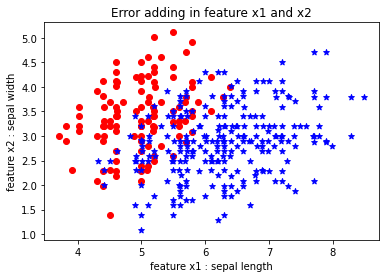

In [71]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.1,x2 0.3 with error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.3 with error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [72]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 with 0.3 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 with 0.3 error : 0.9666666666666667


(20%,10%)

In [73]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2
e2 = temp['x2'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.695634,1.0
351,6.3,3.095634,1.0
352,6.4,2.795634,1.0
353,6.8,2.895634,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


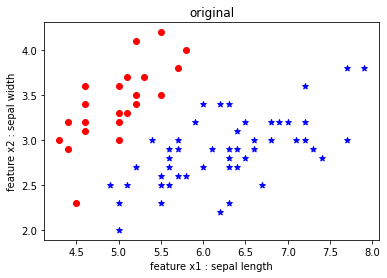

BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 0.1 with error : 0.8838028169014085
BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.3 with error : 0.8450704225352113


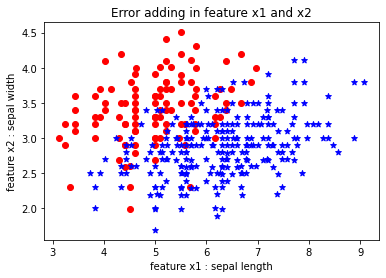

In [74]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 0.1 with error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.1,x2 0.3 with error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [75]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 with 0.3 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.1,x2 with 0.3 error : 0.9


(20%,30%)

In [76]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2
e2 = temp['x2'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.086901,1.0
351,6.3,2.486901,1.0
352,6.4,2.186901,1.0
353,6.8,2.286901,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


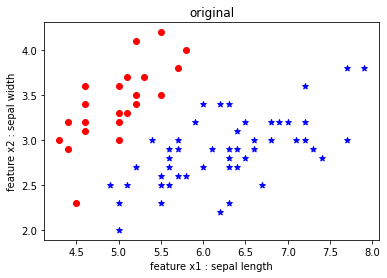

BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 0.3 with error : 0.8169014084507042
BESVM Accuracy (on testing) = with x1 bounded error 0.2,x2 0.3 with error : 0.7887323943661971


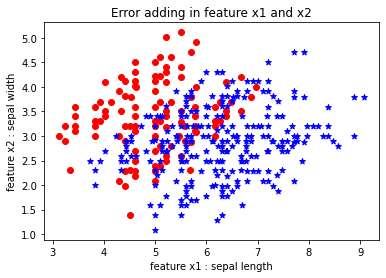

In [77]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.2,x2 0.3 with error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.2,x2 0.3 with error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [78]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.2,x2 with 0.3 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.2,x2 with 0.3 error : 0.8


(30%,10%)

In [79]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3
e2 = temp['x2'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.695634,1.0
351,6.3,3.095634,1.0
352,6.4,2.795634,1.0
353,6.8,2.895634,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


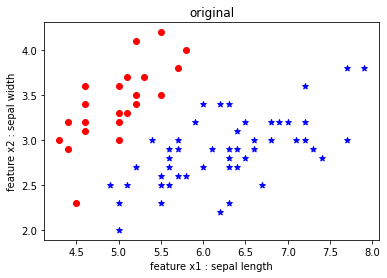

BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 with 0.1 with error : 0.8485915492957746
BESVM Accuracy (on testing) = with x1 bounded error 0.3,x2 with 0.1 with error : 0.8169014084507042


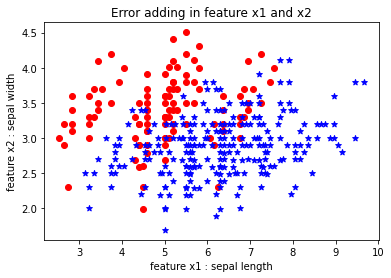

In [80]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 with 0.1 with error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.3,x2 with 0.1 with error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [81]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 with 0.1 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 with 0.1 error : 0.8333333333333334


(30%,20%)

In [82]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3
e2 = temp['x2'].mean()*0.2

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.391268,1.0
351,6.3,2.791268,1.0
352,6.4,2.491268,1.0
353,6.8,2.591268,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


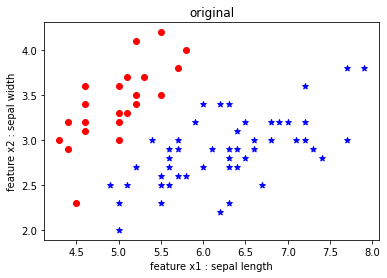

BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 with 0.2 with error : 0.8204225352112676
BESVM Accuracy (on testing) = with x1 bounded error 0.3,x2 with 0.2 with error : 0.7887323943661971


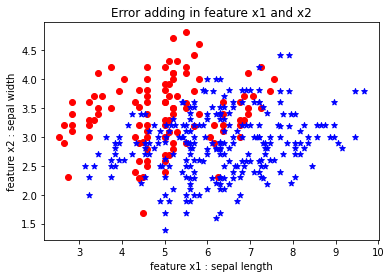

In [83]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error 0.3,x2 with 0.2 with error : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error 0.3,x2 with 0.2 with error : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

In [84]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 with 0.2 error : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x1 bounded error 0.3,x2 with 0.2 error : 0.7
